### __Importamos los datos__

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid")
pd.options.display.float_format = '{:20,.2f}'.format
warnings.filterwarnings('ignore')

### __importamos los datasets__

In [2]:
df_train_values = pd.read_csv('../../datasets/train_values.csv')
df_train_labels = pd.read_csv('../../datasets/train_labels.csv')

#### __Analisis de Geo Level 1__

Queremos saber en qué zonas geográfficas de nivel 1 hubieron mayor cantidad de destrucciones y analizar algunos puntos interesantes que puedan aparecer.

In [3]:
df_train_values_filtered = df_train_values.loc[:, ['building_id', 'geo_level_1_id']]
total_buildings = df_train_values_filtered.count().building_id
total_buildings

260601

In [4]:
total_buildings_by_level_1 = df_train_values_filtered\
    .groupby('geo_level_1_id')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_building_by_geo_1' })
total_buildings_by_level_1.head(10)

,geo_level_1_id,total_building_by_geo_1
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568
5,5,2690
6,6,24381
7,7,18994
8,8,19080
9,9,3958


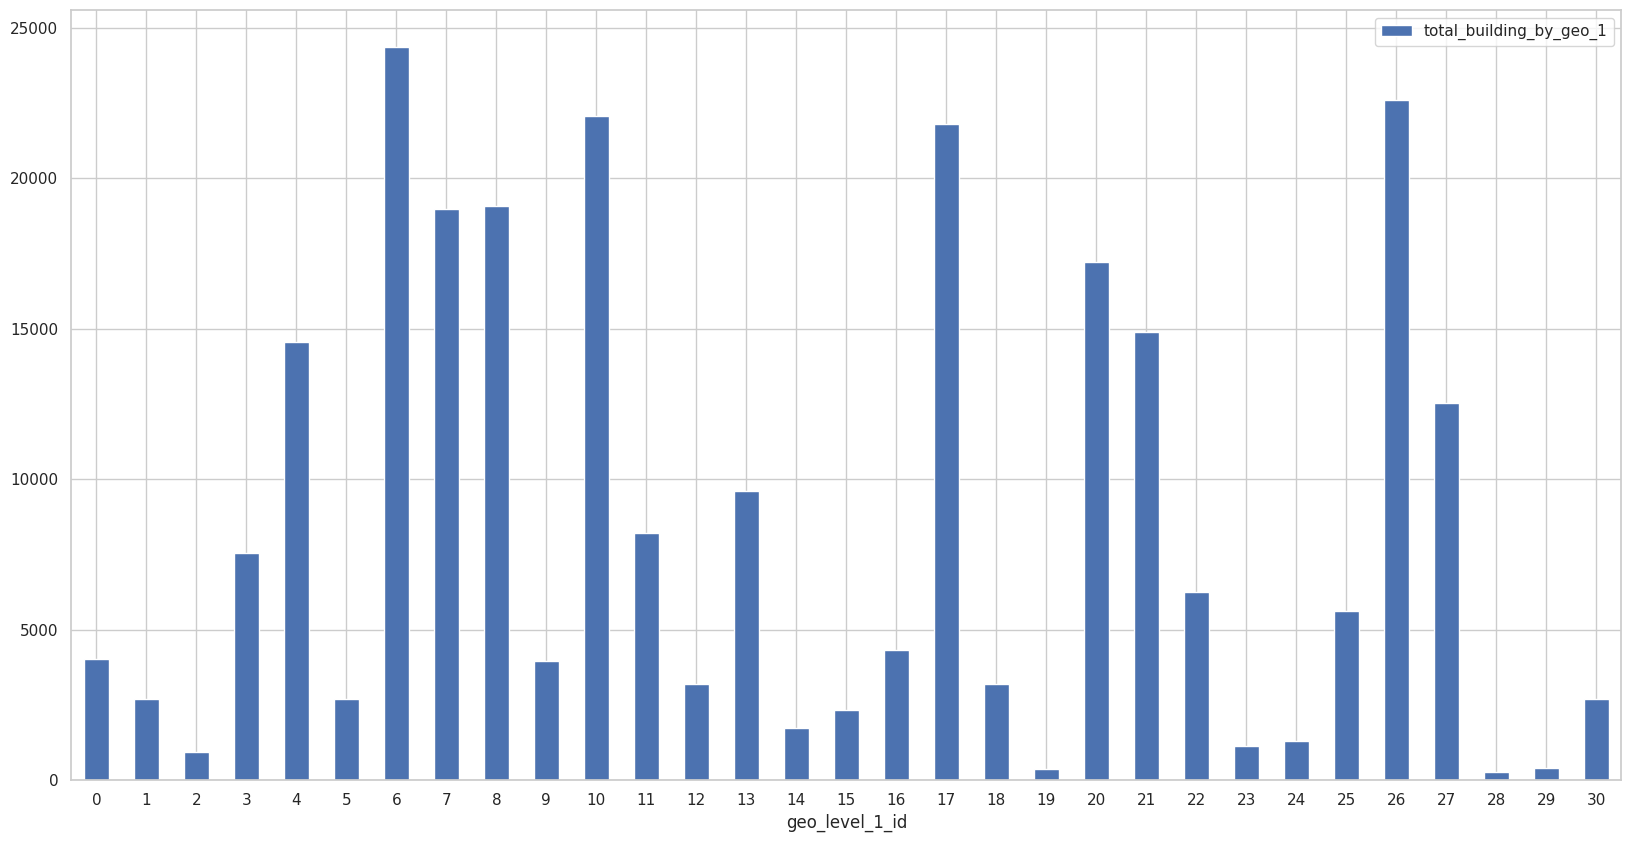

In [5]:
total_buildings_by_level_plot = total_buildings_by_level_1.plot.bar(
    x='geo_level_1_id', 
    y='total_building_by_geo_1', 
    rot=0
)

#### Merge

In [6]:
df_merged_by_geo_and_damage = df_train_values_filtered.merge(df_train_labels)

In [7]:
df_grouped_by_geo_and_damage = df_merged_by_geo_and_damage\
    .groupby(['geo_level_1_id', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={'building_id': 'total_buildings_by_geo_and_samage'})

#### Calcular el porcentaje

In [8]:
df_total_buildings_by_geo = df_merged_by_geo_and_damage\
    .groupby('geo_level_1_id')\
    .count()\
    .reset_index()\
    .rename(columns = { 'building_id': 'total_building_by_geo' })[['geo_level_1_id', 'total_building_by_geo']]

In [9]:
df_percentage_by_geo_ang_damage = df_grouped_by_geo_and_damage.merge(df_total_buildings_by_geo)
df_percentage_by_geo_ang_damage['percentage'] = (df_percentage_by_geo_ang_damage['total_buildings_by_geo_and_samage'] * 100) / df_percentage_by_geo_ang_damage['total_building_by_geo']

In [10]:
df_pivot_by_geo_ang_damage = df_percentage_by_geo_ang_damage.pivot(index='geo_level_1_id', columns='damage_grade',values='percentage')
df_pivot_by_geo_ang_damage

damage_grade,1,2,3
geo_level_1_id,,,
0,8.40,76.66,14.93
1,15.22,73.49,11.29
2,9.13,65.52,25.35
3,3.25,60.34,36.41
4,3.58,76.63,19.79
5,16.58,74.87,8.55
6,8.65,66.54,24.82
7,5.44,59.35,35.21
8,3.43,44.62,51.95


Text(0, 0.5, 'Porcentaje')

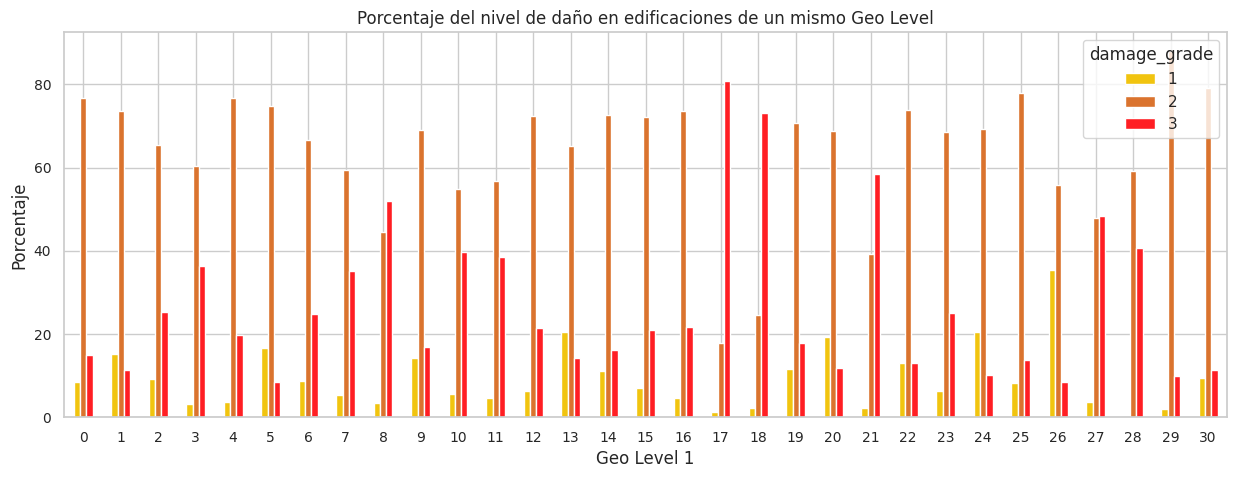

In [11]:
ax = df_pivot_by_geo_ang_damage.plot(
    kind='bar',
    figsize=(15,5),
    rot=0,
    title='Porcentaje del nivel de daño en edificaciones de un mismo Geo Level',
    fontsize=10,
    color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' }
)
ax.set_xlabel('Geo Level 1')
ax.set_ylabel('Porcentaje')

Como era de esperarse, hay lugares que sufrieron muchos daños en comparación a otros, sobre todo con respecto al daño de nivel 3 que son los relevantes. Ahora de acá puede salir otra cuestión:

Tendrán relación las zonas geográficas mas golpeadas en cantidad con las que mayor cantidad de daños nivel 3 tienen?

Obtenemos todas las zonas geográficas que tienen una cantidad de edificios mayores al promedio.

In [12]:
loc_filter = total_buildings_by_level_1['total_building_by_geo_1'] > (total_buildings/30)
df_percentage_by_geo_ang_damage_filtered = total_buildings_by_level_1\
    .loc[loc_filter, ['geo_level_1_id']]\
    .merge(df_percentage_by_geo_ang_damage)

In [13]:
df_pivot_by_geo_ang_damage_filtered = df_percentage_by_geo_ang_damage_filtered\
    .pivot(index='geo_level_1_id', columns='damage_grade',values='percentage')

Text(0, 0.5, 'Porcentaje')

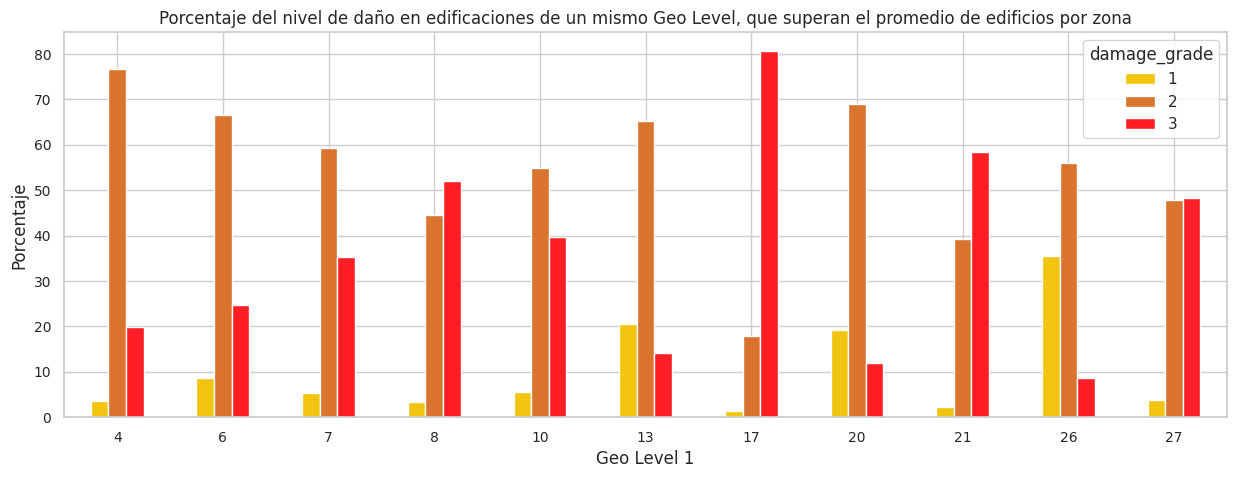

In [14]:
ax = df_pivot_by_geo_ang_damage_filtered.plot(
    kind='bar',
    figsize=(15,5),
    rot=0,
    title='Porcentaje del nivel de daño en edificaciones de un mismo Geo Level, que superan el promedio de edificios por zona',
    fontsize=10,
    color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' }
)
ax.set_xlabel('Geo Level 1')
ax.set_ylabel('Porcentaje')

Podríamos decir entonces que las zonas que tienen un total de edificios dañados, mayores al promedio, en general tienen un porcetaje elevado de daño 3.

Una nueva pregunta podría ser:

Por que las zonas 13, 20 y 26 han tenido tantos edificios dañados pero una propoción tan alta de edificios con nivel 1? ya que tienen el doble o triple con respecto a edificios de otras zonas.

In [15]:
df_less_damaged_zones = df_train_values\
    .loc[(df_train_values['geo_level_1_id'] == 13) | (df_train_values['geo_level_1_id'] == 20) | (df_train_values['geo_level_1_id'] == 26), :]\
    .merge(df_train_labels)

#### observo la antiguedad

In [16]:
df_less_damaged_zones_by_total = df_less_damaged_zones
df_less_damaged_zones_by_total['total_by_age_and_damage'] = 1
df_less_damaged_zones_by_total = df_less_damaged_zones_by_total\
    .groupby(['age', 'damage_grade'])\
    .agg({'total_by_age_and_damage': 'count'})\
    .reset_index()
dt_total_by_age = df_less_damaged_zones\
    .groupby(['age'])\
    .agg({ 'building_id': 'count' })\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_by_age' })

df_total_by_age_percentage_damage = dt_total_by_age\
    .merge(df_less_damaged_zones_by_total)

df_total_by_age_percentage_damage['percentage'] = (df_total_by_age_percentage_damage['total_by_age_and_damage'] * 100) / df_total_by_age_percentage_damage['total_by_age']

Text(0, 0.5, 'Porcentaje')

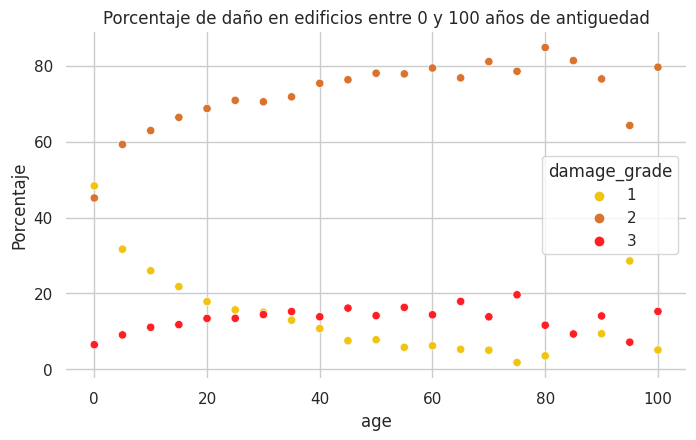

In [17]:
df = df_total_by_age_percentage_damage.loc[df_total_by_age_percentage_damage['age'] <= 100, :]
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot = sns.scatterplot(
    x="age",
    y="percentage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Porcentaje de daño en edificios entre 0 y 100 años de antiguedad')
plt.xlabel('age')
plt.ylabel('Porcentaje')

Text(0, 0.5, 'Cantidad de edificios')

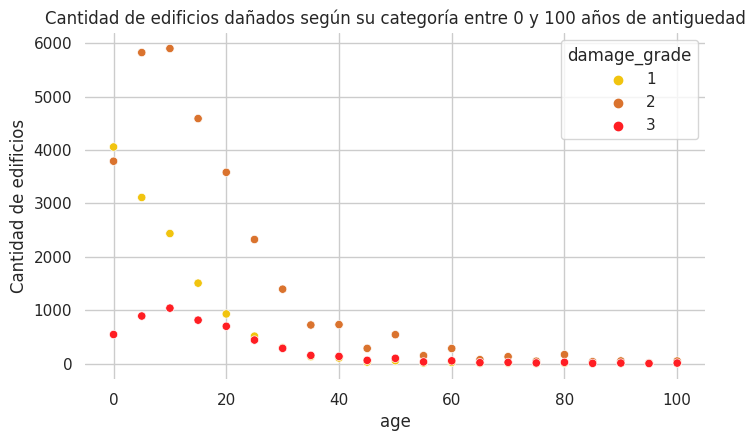

In [18]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot2 = sns.scatterplot(
    x="age",
    y="total_by_age_and_damage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Cantidad de edificios dañados según su categoría entre 0 y 100 años de antiguedad')
# Set x-axis label
plt.xlabel('age')
# Set y-axis label
plt.ylabel('Cantidad de edificios')

Podemos ver como predominan los edificios de pocos años, lo cual es una tendencia a que los riesgos sean leves. 

Si bien a medida que pasa el tiempo se nota un deterioro en las construcciones, los primeros 30 años concentran la mayor cantidad de construcciones. 

Podríamos decir entonces que es el motivo por el cual estas zonas particulares no fueron afectadas. 

Tomamos el segmento de edificios menos dañados para poder profundizar en por qué fueron menos dañados en el tiempo.

In [19]:
df_less_damaged_zones.loc[
    (df_less_damaged_zones['damage_grade'] == 1) &
    (df_less_damaged_zones['age'] <= 30), 
    ['count_floors_pre_eq', 'building_id']
]\
    .groupby('count_floors_pre_eq')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_floor' })

,count_floors_pre_eq,total_buildings_by_floor
0,1,5396
1,2,6810
2,3,571
3,4,56
4,5,8
5,6,3
6,7,1
7,9,1


Otro motivo por el cual estas zonas son poco dañadas es que la mayoría de los edificios son de 1 y 2 pisos. Siendo un número bastante menor los edificios de 3 pisos en este segmento, el cuál fue el mas golpeado.

In [20]:
df_less_damaged_zones.loc[
    (df_less_damaged_zones['damage_grade'] == 1) &
    (df_less_damaged_zones['age'] <= 30), 
    ['plan_configuration', 'building_id']
]\
    .groupby('plan_configuration')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_plan' })

,plan_configuration,total_buildings_by_plan
0,a,35
1,c,24
2,d,11872
3,m,6
4,n,2
5,o,29
6,q,359
7,s,31
8,u,488


Este cuadro nos indica que el 50% del de los edificios de daño 1 con categoría D están en este segmento. Lo cual lleva a deducir que la categoría D en estas zonas geográficas, podría llegar a ser resistente. Mientras que en las demás zonas podría llegar a ser mucho menos efectivo.

__conclusión importante: charlarla con los chicos__

In [21]:
df_less_damaged_zones.loc[
    (df_less_damaged_zones['damage_grade'] == 1) &
    (df_less_damaged_zones['age'] <= 30), 
    ['foundation_type', 'building_id']
]\
    .groupby('foundation_type')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_foundation_type' })


,foundation_type,total_buildings_by_foundation_type
0,h,246
1,i,1495
2,r,5163
3,u,2054
4,w,3888


### __Edificios mas dañados__

In [22]:
df_more_damaged_zones = df_train_values\
    .loc[(df_train_values['geo_level_1_id'] == 17) | (df_train_values['geo_level_1_id'] == 8) | (df_train_values['geo_level_1_id'] == 27), :]\
    .merge(df_train_labels)

In [23]:
df_more_damaged_zones_by_total = df_more_damaged_zones
df_more_damaged_zones_by_total['total_by_age_and_damage'] = 1
df_more_damaged_zones_by_total = df_more_damaged_zones_by_total\
    .groupby(['age', 'damage_grade'])\
    .agg({'total_by_age_and_damage': 'count'})\
    .reset_index()
dt_total_by_age = df_more_damaged_zones\
    .groupby(['age'])\
    .agg({ 'building_id': 'count' })\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_by_age' })

df_total_by_age_percentage_damage = dt_total_by_age\
    .merge(df_more_damaged_zones_by_total)

df_total_by_age_percentage_damage['percentage'] = (df_total_by_age_percentage_damage['total_by_age_and_damage'] * 100) / df_total_by_age_percentage_damage['total_by_age']
df_total_by_age_percentage_damage

,age,total_by_age,damage_grade,total_by_age_and_damage,percentage
0,0,4595,1,573,12.47
1,0,4595,2,1781,38.76
2,0,4595,3,2241,48.77
3,5,5913,1,319,5.39
4,5,5913,2,2178,36.83
...,...,...,...,...,...
79,200,19,2,7,36.84
80,200,19,3,12,63.16
81,995,247,1,4,1.62
82,995,247,2,122,49.39


Text(0, 0.5, 'Porcentaje')

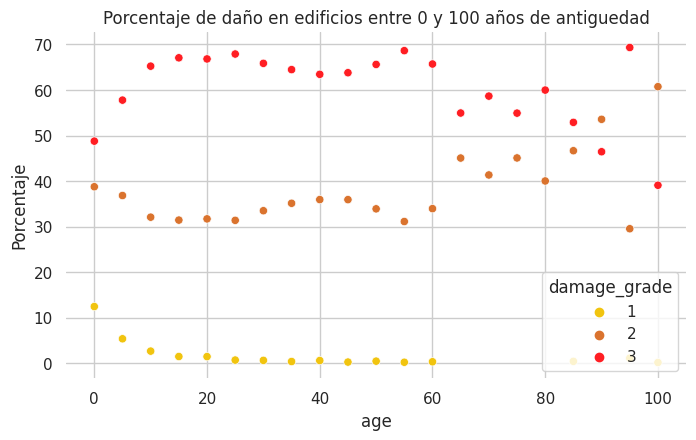

In [24]:
df = df_total_by_age_percentage_damage.loc[df_total_by_age_percentage_damage['age'] <= 100, :]
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot = sns.scatterplot(
    x="age",
    y="percentage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Porcentaje de daño en edificios entre 0 y 100 años de antiguedad')
plt.xlabel('age')
plt.ylabel('Porcentaje')

Text(0, 0.5, 'Cantidad de edificios')

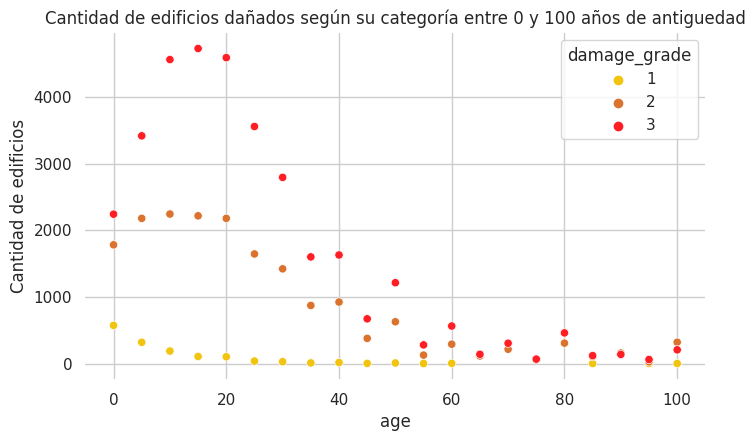

In [25]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4.5))
sns.despine(f, left=True, bottom=True)
damage = [1, 2, 3]
plot2 = sns.scatterplot(
    x="age",
    y="total_by_age_and_damage",
    hue="damage_grade",
    palette={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' },
    data=df,
    ax=ax
)
plt.title('Cantidad de edificios dañados según su categoría entre 0 y 100 años de antiguedad')
# Set x-axis label
plt.xlabel('age')
# Set y-axis label
plt.ylabel('Cantidad de edificios')

In [26]:
df_more_damaged_zones.loc[
    (df_more_damaged_zones['damage_grade'] == 3) &
    (df_more_damaged_zones['age'] <= 30), 
    ['count_floors_pre_eq', 'building_id']
]\
    .groupby('count_floors_pre_eq')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_floor' })

,count_floors_pre_eq,total_buildings_by_floor
0,1,2756
1,2,14056
2,3,8913
3,4,114
4,5,33
5,6,7
6,7,2


In [27]:
df_more_damaged_zones.loc[
    (df_more_damaged_zones['damage_grade'] == 3) &
    (df_more_damaged_zones['age'] <= 30), 
    ['plan_configuration', 'building_id']
]\
    .groupby('plan_configuration')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_plan' })

,plan_configuration,total_buildings_by_plan
0,a,2
1,c,11
2,d,24812
3,f,5
4,n,2
5,o,5
6,q,927
7,s,20
8,u,97


In [28]:
df_more_damaged_zones.loc[
    (df_more_damaged_zones['damage_grade'] == 3) &
    (df_more_damaged_zones['age'] <= 30), 
    ['foundation_type', 'building_id']
]\
    .groupby('foundation_type')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_buildings_by_foundation_type' })

,foundation_type,total_buildings_by_foundation_type
0,h,28
1,i,143
2,r,24887
3,u,761
4,w,62
